# campData - Machine Learning Workshop

## Imports

Nesta sessão, iremos realizar os imports de bibliotecas necessárias para o nosso trabalho.

In [12]:
import numpy as np  # numeric functions
import matplotlib.pyplot as plt   # plot graphs
import pandas as pd   # dataframe structure
import seaborn as sns  # matplotlib competitor - more beautiful graphs

# scikit-learn - tools for feature engineering, sample datasets
from sklearn.preprocessing import StandardScaler  
from sklearn.datasets import load_boston  # housing prices in Boston from the 70's
from sklearn.decomposition import PCA  # reduce dimensions

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline  # magic - plot result in the next cell!

## Análise Exploratória de Dados

Nesta análise, teremos como objetivo descobrir mais sobre os dados. Sua distribuição, qualidade, atributos, etc.

In [20]:
# First step is to load the dataset
boston_dataset = load_boston()

In [21]:
# To work with the data, let's transform the dataset into a pandas' DataFrame
df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

In [22]:
# head() will show us some of the first rows in the dataset
# CRIM - crime per capta
# ZN - proportion of residential land zoned for lots over 25,0000 sq.ft
# INDUS - proportion of non-retail business acres per town
# CHAS - Charles River dummy variable (=1 if tract bounds river; 0 otherwise)
# NOX - air polution
# RM - rooms per dwelling
# AGE - proportion of homes built by 1940
# DIS - distance from employment centers
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRADIO pupil-teacher ration by town
# B 1000(Bk - 0.63)^ where Bk is the proportion of blacks by town
# LSTAT % lower status of the population
# MEDV - median value of owner-occupied homes in $1000's
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
# let us include the price
df['PRICE'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
# how many rows and dimensions do we have?
df.shape

(506, 14)

In [26]:
# what are the types of data?
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [27]:
# are there any empty / null values? - if there are multiple types among the values in a single dimension, 
# it will cast everything as text
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [28]:
# We can also verify the overall characteristics of data
# understand the distribution of data
# AGE in percentiles:
#   in 25% of the dataset 45% of houses were built by 1940
#   in 50% of the dataset 77% of houses were built by 1940
#   in 75% of the dataset 94% of houses were built by 1940
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


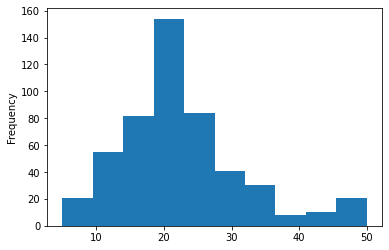

In [31]:
# How is the price distribution?
# let's plot a histogram to view the distribution of values in the price
df['PRICE'].plot.hist()

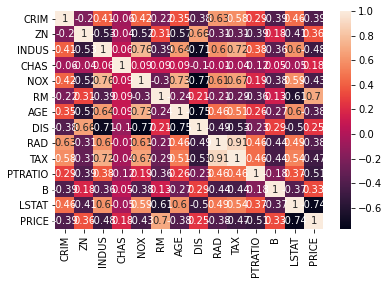

In [33]:
# correlation among attributes
correlation_matrix = df.corr().round(2)

# in the heatmap, the lighter the color the stronger the correlation
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

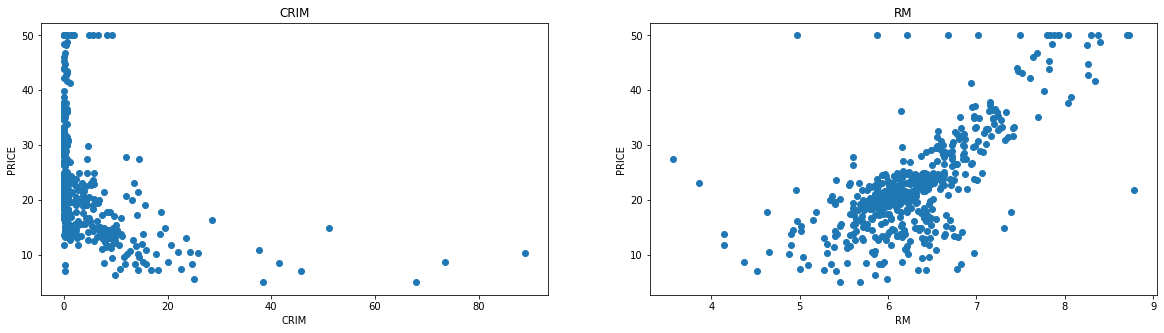

In [34]:
# Verifying the correlation of features and the target
# There is a non linear correlation between CRIM and PRICE
# There is a more linear correlation between RM and PRICE
plt.figure(figsize=(20, 5))

features = ['CRIM', 'RM']
target = df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

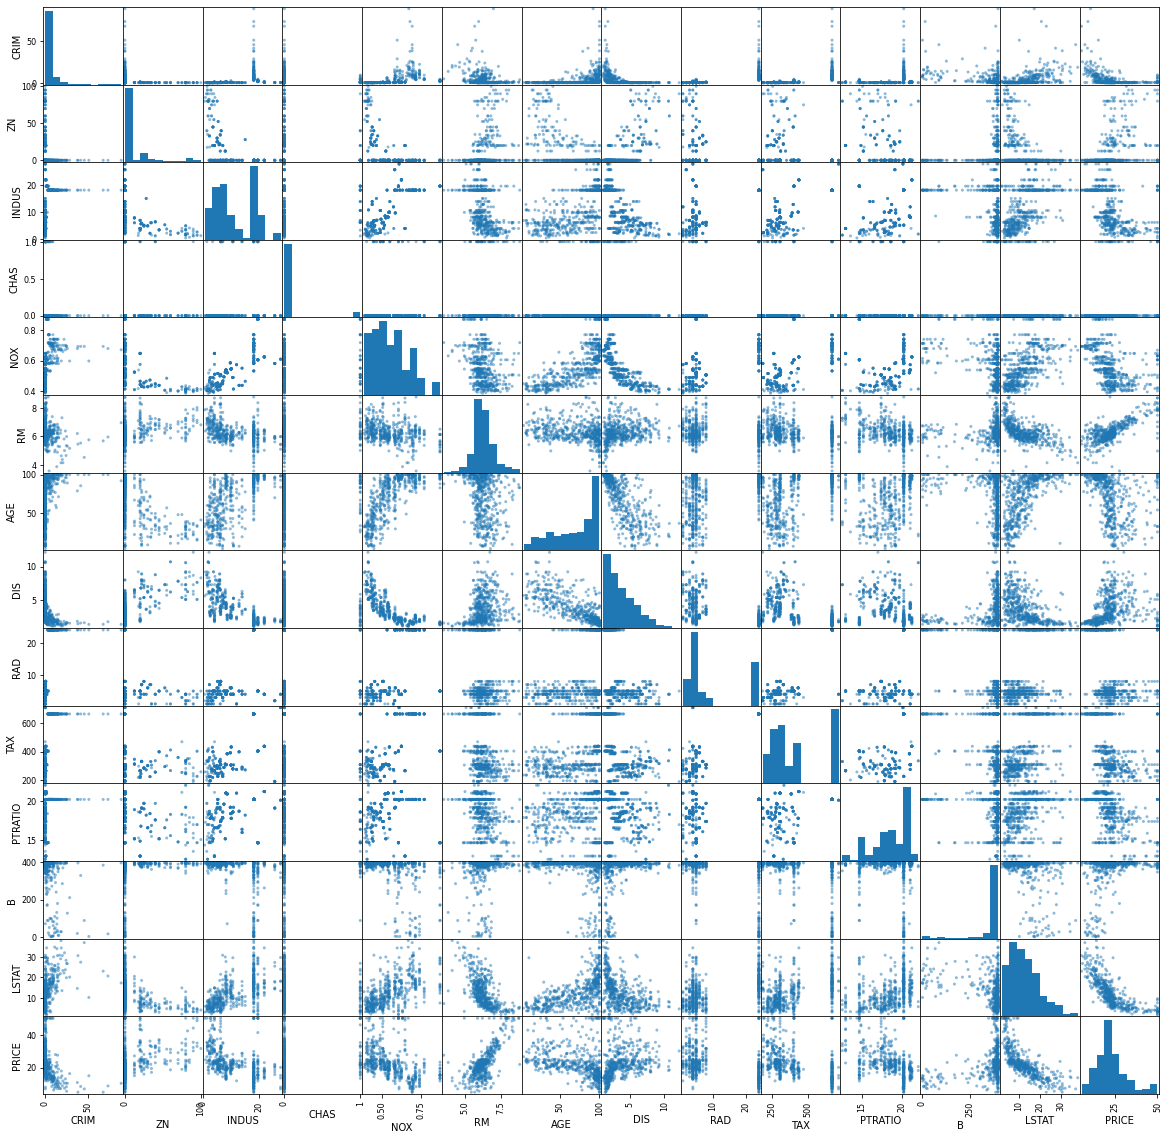

In [35]:
# Scatterplot of all correlations
pd.plotting.scatter_matrix(df, figsize=[20,20])
plt.show()

## Feature Engineering

Nesta sessão nossa preocupação é parar de pensar como humanos e tentar entender qual é a melhor forma de representar os dados, para que o algoritmo possa encontrar padrões mais facilmente.

In [39]:
# Choose which features we want to work with - CRIM and RM
x = df[['CRIM','RM']]
x.head()  # notice the different 

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [41]:
# Normalization - normalize scales
x_scaled = StandardScaler().fit_transform(x)

In [42]:
# Visualizing the values
df_normalized = pd.DataFrame(x_scaled)  # transform the scaled DF into a dataframe
df_normalized.columns = ['CRIM', 'RM']
df_normalized.head()  # notice the normalized data values! values are now comparable

,CRIM,RM
0,-0.419782,0.413672
1,-0.417339,0.194274
2,-0.417342,1.282714
3,-0.416750,1.016303
4,-0.412482,1.228577


In [43]:
# Reduzindo a dimensionalidade com PCA (principal component analysis)
pca = PCA(n_components=2)  # we tell PCA we have 2 input dimensions
principalComponents = pca.fit_transform(x_scaled)  # this will reduce the dimensions

In [44]:
# AssigningAtribuindo o resultado para um dataframe
# it generates an ortogonal plan for each dimension we passed to PCA
df_pca = pd.DataFrame(data=principalComponents, columns = ['pc1', 'pc2'])  
df_pca.head()

,pc1,pc2
0,-0.589341,-0.004320
1,-0.432476,-0.157731
2,-1.202121,0.611910
3,-1.013321,0.423947
4,-1.160404,0.577066


In [45]:
# Verifying the explicability of components
pca.explained_variance_ratio_
# the higher the number the better that column maintains the distribution of data in the reduced dimension
# 60 means that pc1 describes CRIM + RM 60% of the time
# 39 means that pc2 describes CRIM + RM 39% of the time
# if both numbers were 50 - it means none of the ortogonal plans are good

array([0.60962335, 0.39037665])

## Treinamento de Modelo

Nesta sessão usaremos os dados disponíveis para treinar um modelo de machine learning.

In [116]:
# Primeiro precisamos separar o dataset em Treino e Teste
# Let us first train the model with all the dimensions
X = df[['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'LSTAT']]
# X = df_pca[['pc1']]
y = df['PRICE']
# separata the dataframe into a training set (80%) and a test set (20%) - we should not use the test data to 
# train the model, otherwise, it will already know the answer, we need to test it with unknown data
# random_state is a seed to randomize the test vs. train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Let us train the model
model = LinearRegression()   # using LinearRegression
model.fit(X_train, y_train)  # train with the X_train and y_train prepared by train_test_split
# fit the data = fit a line over the data values

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
# Verifying the weights of the linear regression
print(model.intercept_)  # the bias
print(model.coef_)       # coeficients for the input variables
# the higher the coeficient the most it impacts in the target value: INDUS and RM

5.6756906654622234
[-0.14229014 -0.16797463  5.17731089 -0.02285018 -1.12017435 -0.59301257]


## Avaliação de Modelo

Nesta sessão verificamos se nosso modelo está fazendo predições corretas o suficiente.

In [119]:
# Realizando uma predição
y_pred = model.predict(X_test)

In [120]:
# Comparando o real com o predito
dfAval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
dfAval.head(15)

,Actual,Predicted
173,23.6,27.953110
274,32.4,32.166481
491,13.6,16.910947
72,22.8,25.872877
452,16.1,19.520825
76,20.0,22.674595
316,17.8,17.335887
140,14.0,15.650482
471,19.6,21.133854
500,16.8,22.102293


In [121]:
# Model metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# always take notes on the different results we get from training different models with different dimensions
# then we can compare results and make an informed decision and choose one
# once in production - we also must keep monitoring these metrics to learn when we should 
# MAE - 3.90% - it means that the average error was by 3.90% - in our case, the prices are in units of $1,000
# so our average error is by $3.900

Mean Absolute Error: 3.8085127966073937
Mean Squared Error: 30.508176406234284
Root Mean Squared Error: 5.523420716026825


## Realizando Classificações

In [122]:
# Separando os dataframes
dfClass = df.copy()
dfClass.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


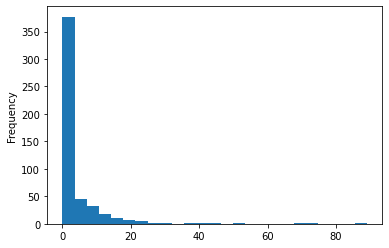

In [129]:
# Verificando a distribuição de CRIM
dfClass['CRIM'].plot.hist(bins=25)

In [131]:
# Criando feature de lugar seguro
# IS_SAFE = a region where CRIM is lower than 0.25
dfClass['IS_SAFE'] = dfClass['CRIM'].apply(lambda x: 1 if (x<0.25) else 0)

In [132]:
# Verificando se deu certo
dfClass[dfClass['CRIM'] < 0.25].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,IS_SAFE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


In [259]:
# Primeiro precisamos separar o dataset em Treino e Teste
X = dfClass[['RAD', 'TAX', 'NOX', 'INDUS']]
y = dfClass['IS_SAFE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
# Criando o modelo de classificação
logisticRegr = LogisticRegression()

In [262]:
# Fitando o modelo
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [263]:
# Predizendo resultados
predictions = logisticRegr.predict(X_test)

In [264]:
# Verificando o score
score = logisticRegr.score(X_test, y_test)

In [265]:
# Calculando matriz de confusão
cm = metrics.confusion_matrix(y_test, predictions)

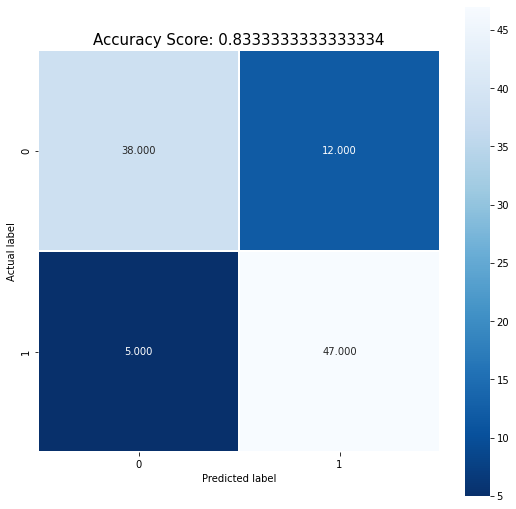

In [266]:
# Plotando matriz de confusão
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In [267]:
# we always read from the perspective of the positive class